# FACIAL EXPRESSEION RECOGNITION USING CONVOLUTIONAL NEURAL NETWORK AND BATCH NORMALIZATION

## Importing necessary libraries and modules

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

## Mounting Google Drive to access files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


## Define function to plot example images

In [5]:
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def plot_example_images(plt):
    img_size = 48
    plt.figure(0, figsize=(12,20))
    ctr = 0

    for expression in os.listdir("/content/drive/MyDrive/Allfiles/facial_data/train/"):
        for i in range(1,6):
            ctr += 1
            plt.subplot(7,5,ctr)
            img = load_img("/content/drive/MyDrive/Allfiles/facial_data/train/" + expression + "/" +os.listdir("/content/drive/MyDrive/Allfiles/facial_data/train/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

In [6]:
for expression in os.listdir("/content/drive/MyDrive/Allfiles/facial_data/train/"):
    print(str(len(os.listdir("/content/drive/MyDrive/Allfiles/facial_data/train/"+expression))) + " " + expression + " images.")

3020 neutral images.
3010 happy images.
3150 sad images.


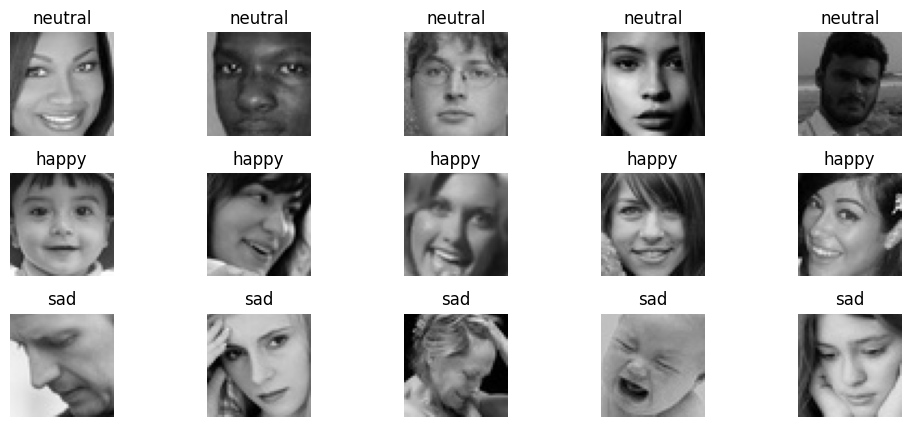

In [19]:
def plot_example_train_images_with_labels(plt):
    img_size = 48
    plt.figure(0, figsize=(10, 10))
    ctr = 0

    for expression in os.listdir("/content/drive/MyDrive/Allfiles/facial_data/train/"):
        for i in range(1, 6):
            ctr += 1
            plt.subplot(7, 5, ctr)
            img_path = "/content/drive/MyDrive/Allfiles/facial_data/train/" + expression + "/" + os.listdir("/content/drive/MyDrive/Allfiles/facial_data/train/" + expression)[i]
            img = load_img(img_path, target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")
            plt.title(expression)  # Display class label as title
            plt.axis('off')

    plt.tight_layout()
    return plt


# Display sample train images
plt = plot_example_train_images_with_labels(plt)
plt.show()


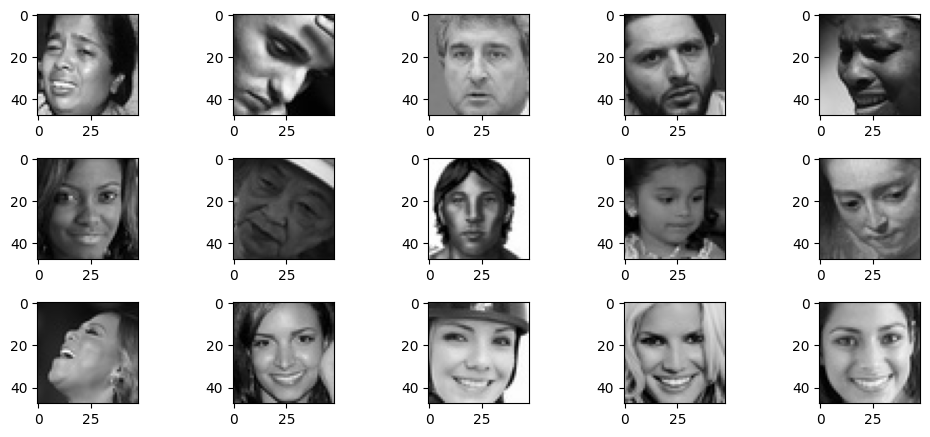

In [17]:
def plot_example_test_images(plt):
    plt.figure(0, figsize=(10,10))
    ctr = 0

    for expression in os.listdir("/content/drive/MyDrive/Allfiles/facial_data/test/"):
        for i in range(1, 6):
            ctr += 1
            plt.subplot(7, 5, ctr)
            img = load_img("/content/drive/MyDrive/Allfiles/facial_data/test/" + expression + "/" + os.listdir("/content/drive/MyDrive/Allfiles/facial_data/test/" + expression)[i], target_size=(img_size, img_size))
            plt.imshow(img, cmap="gray")

    plt.tight_layout()
    return plt

# Display sample test images
plt = plot_example_test_images(plt)
plt.show()


## Setting image size and batch size and creating data generators for training and validation

In [7]:
img_size = 48
batch_size = 128

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/Allfiles/facial_data/train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory("/content/drive/MyDrive/Allfiles/facial_data/test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 9180 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


## Build the CNN model architecture

In [8]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(3, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

## Set training parameters and model callbacks

In [ ]:
epochs = 50
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [checkpoint, reduce_lr]

## Train the model

In [9]:

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

Epoch 1/50
71/71 [==============================] - ETA: 0s - loss: 1.1569 - accuracy: 0.4444 
Epoch 1: saving model to model_weights.h5
71/71 [==============================] - 1198s 17s/step - loss: 1.1569 - accuracy: 0.4444 - val_loss: 1.3486 - val_accuracy: 0.3603 - lr: 0.0010
Epoch 2/50
71/71 [==============================] - ETA: 0s - loss: 0.9441 - accuracy: 0.5568
Epoch 2: saving model to model_weights.h5
71/71 [==============================] - 18s 252ms/step - loss: 0.9441 - accuracy: 0.5568 - val_loss: 0.8975 - val_accuracy: 0.5735 - lr: 0.0010
Epoch 3/50
71/71 [==============================] - ETA: 0s - loss: 0.8493 - accuracy: 0.6088
Epoch 3: saving model to model_weights.h5
71/71 [==============================] - 20s 280ms/step - loss: 0.8493 - accuracy: 0.6088 - val_loss: 0.8551 - val_accuracy: 0.6108 - lr: 0.0010
Epoch 4/50
71/71 [==============================] - ETA: 0s - loss: 0.7812 - accuracy: 0.6418
Epoch 4: saving model to model_weights.h5
71/71 [=============

## Plotting training history (accuracy and loss)

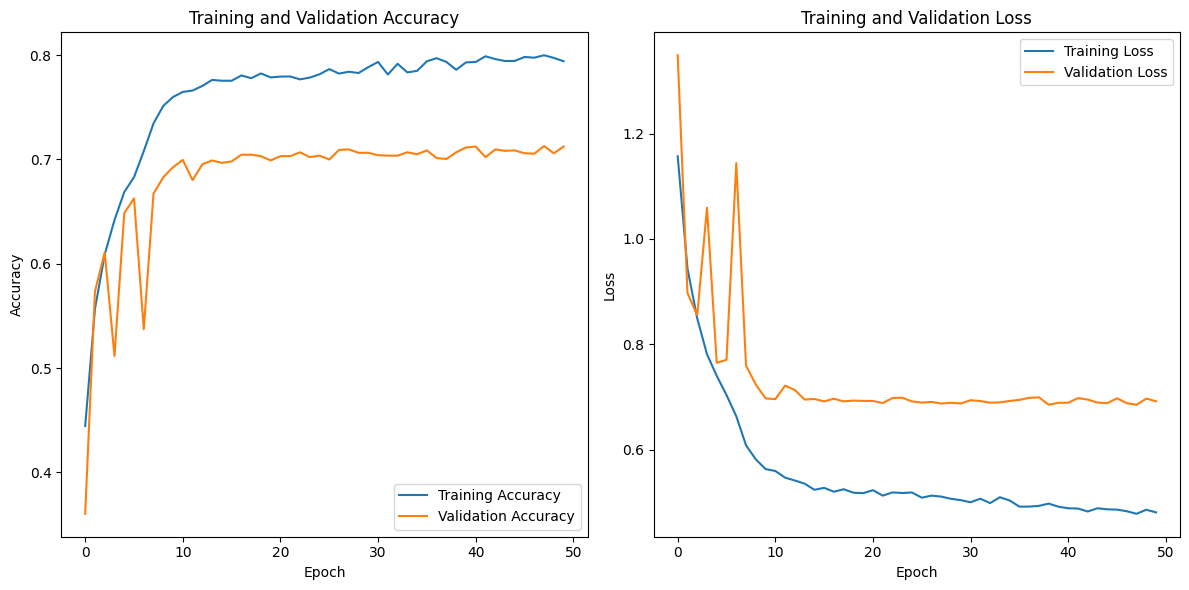

In [13]:
# After model training

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Load saved model weights

In [14]:
model_file_path = os.path.join(
    os.getcwd(),'model_weights.h5')
model.load_weights(model_file_path)
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0005), metrics=['accuracy'])
test_dataset_file_path = os.path.join(
    os.getcwd(), 'test')

## Evaluate the model on test data

In [15]:
scores = model.evaluate_generator(validation_generator)
print("Test accuracy:", scores[1])

<ipython-input-15-40f67d656803>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model.evaluate_generator(validation_generator)


Test accuracy: 0.7048888802528381


## Calculate and plot confusion matrix

18/18 [==============================] - 5s 289ms/step
Normalized confusion matrix


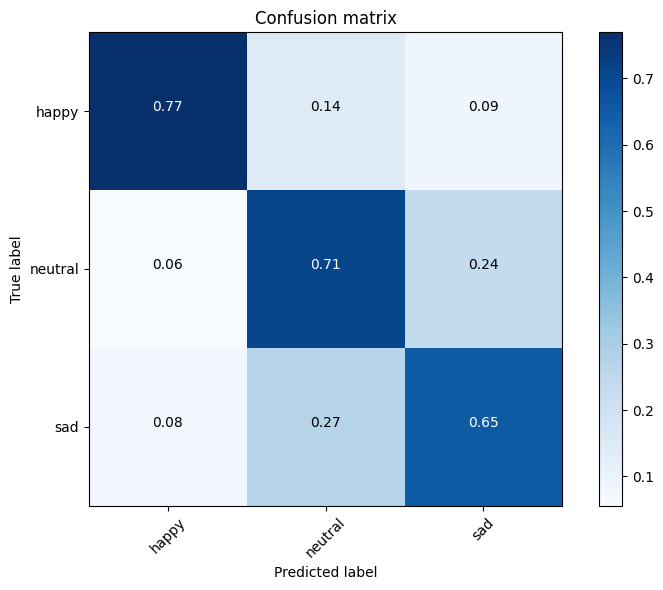

In [22]:
from sklearn.metrics import confusion_matrix, classification_report
import itertools
# Calculate confusion matrix
y_true = validation_generator.classes
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(confusion_mtx, classes=validation_generator.class_indices.keys(), normalize=True, title='Confusion matrix')
plt.show()


## Calculate classification report

In [24]:
class_names = list(validation_generator.class_indices.keys())
classification_rep = classification_report(y_true, y_pred_classes, target_names=class_names)

# Print classification report
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

       happy       0.85      0.77      0.81       750
     neutral       0.63      0.71      0.67       750
         sad       0.67      0.65      0.66       750

    accuracy                           0.71      2250
   macro avg       0.72      0.71      0.71      2250
weighted avg       0.72      0.71      0.71      2250

